# Basic principles of pricing and hedging

We shall first go through basic principles of modeling in mathematical Finance before we introduce concepts of interest rate theory.

We shall denote by $ S^i $ the price of asset $i$ and by $ H^i $ the holdings in asset $i$ (can be any real number here, no market frictions assumed). $ H^i_t $ is determined at time $ t- 1 $ with all the information available there.

First we learn to write portfolio values, i.e. $ V_t = \sum_{i=0}^d H^i_tS^i_t $ as P & L processes in case the portfolio is self-financing. Self-financing means that
$$
\sum_{i=0}^d H^i_{t+1}S^i_t = \sum_{i=0}^d H^i_tS^i_t \, ,
$$
which in turn leads to
$$
V_{t+1} - V_t = \sum_{i=0}^d H^i_{t+1} (S^i_{t+1} - S^i_{t}) \, .
$$
This means that the change in value of the portfolio comes from the change in value of the prices and nothing else.

This formula allows for a simplification. If we divide everything by the value of $S^0$, the price of the $0$-th asset, then in the above sum one term vanishes. We denote $ X^i_t = S^i_t/S^0_t $
When discounted, e.g. by $S^0$, this means
$$
\frac{V_t}{S^0_t} - \frac{V_0}{S^0_0} = (H \bullet X)_t = \sum_{s \leq t} \sum_{i=1}^d H^i_{t+1} (X^i_{s+1} - X^i_{s})\, .
$$
Notice that the inner sum only starts at $1$ because $ X^0_t = 1 $.

The right hand side is a P & L process. The argument can be turned around: given a portfolio value which is given by a constant plus a P & L process, then we can of course construct a self-financing portfolio.

Notice that this argument holds for any numeraire $S^0$: it only has to be default-free, i.e. never attaining the price $0$. We can calculate self-financing portfolios with respect to convenient numeraires and then switch back to the original undiscounted terms.

### A model is free of arbitrage if there is no self-financing portfolio which starts at zero and has a positive outcome

### We assume from now on that any positive outcome of a self-financing portfolio cannot come for free, i.e. the initial capital $x$ has to be positive, too.

This leads us the valuation problem: what is the value of a payoff $f$ at time $T$? We can answer that by constructing appropriate (super-)hedging portfolios. Superhedging just means hear "dominating".

Let us consider this question in a one period case, i.e. $T=1$. The states of the world are denoted by $\omega$, hence we are interested in the question to find the smallest $ x $ such that for all $ \omega $
$$
f(\omega) \leq x + \sum_{i=1}^d H_0^i (X^i_1(\omega)-X^i_0(\omega)) \, .
$$
This is equivalent to characterize the cone $ C:= \{ (H \bullet X)_1 - g \text{ for all possible strategies } H \text{ and } g \geq 0\} $.

This is a geometric question: the solution is $ C = \{ e \text{ such that } E_Q[e] \leq 0 \text{ for all equivalent martingale measures } $Q$\} $. This yields the beautiful formula
$$
\sup_{Q \in \mathcal{M}} E_Q[f] = \inf \{x \text{ such that there is a strategy } H \text{ with } f \leq x + (H \bullet X)_1 \} \, .
$$
The set $\mathcal{M} $ is the set of equivalent martingale measures. A super-hedging portfolio is a self-financing portfolio (i.e. the value process is the initial value of the portfolio plus the P&L process -- all in discounted terms) dominating a certain payoff.

This generalizes of course to the multi-period case.

### This yields the following pricing formula: if a payoff's contract is liquidly traded at price $ \pi_t(f) $ at intermediate times $ t $, then there exists an equivalent martingale measure for the given market constituted by $X^1,\dots,X^d$ such that
$$
E_Q\big[ \frac{f}{S^0_T} | \mathcal{F}_t \big] = \frac{\pi_t(f)}{S^0_t} .
$$
Let us consider these principles in the following modeling situations. Furthermore models are free of arbitrage if and only if there exists an equivalent pricing measure, which associates in particular to P & L processes the value $0$. Whence prices of payoffs can be calculated by taking expectations (i.e. a Monte Carlo evaluation is possible) with respect to this equivalent pricing measure.


First we draw the tree in undiscounted terms in the format time / numeraire / stock price. For simplicity we take the numeraire equal to $1$ but one can easily adapt that. Next the draw the tree in discounted terms in the format time / price. 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


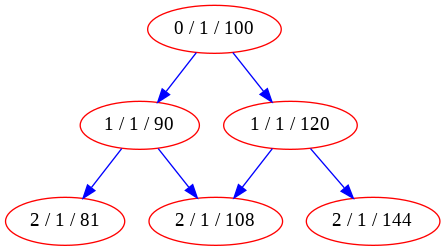

In [1]:
!apt install libgraphviz-dev
%pip install graphviz
%pip install pygraphviz
import numpy as np
from itertools import product


# EUROPEAN
S0 = 100.
u  = 1.2
d  = 0.9
payoffE = lambda S: np.maximum(S-S0,0.)

timesteps = 2
bin = set((0,1))
trajectories = set(product(bin, repeat = timesteps))


import pygraphviz as PG
from IPython.display import Image
binomialtreeforward = PG.AGraph(directed=True, strict=True)
binomialtreeforward.edge_attr.update(len='2.0',color='blue')
binomialtreeforward.node_attr.update(color='red')
binomialtreeforwarddiscounted = PG.AGraph(directed=True, strict=True)
binomialtreeforwarddiscounted.edge_attr.update(len='2.0',color='blue')
binomialtreeforwarddiscounted.node_attr.update(color='red')
binomialtreebackward = PG.AGraph(directed=True, strict=True)
binomialtreebackward.edge_attr.update(len='2.0',color='blue')
binomialtreebackward.node_attr.update(color='red')
process = {(omega,0):S0 for omega in trajectories}
numeraire = {(omega,0):1. for omega in trajectories}
discountedprocess = {(omega,0):S0 for omega in trajectories}

#construct process by forward steps
for time in range(1,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        process.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        #shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        numeraire.update({(omega,time):1.0})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforward.add_edge('%d / %d / %d'% (time-1,numeraire[(omega,time-1)],process[(omega,time-1)]),
                                     '%d / %d / %d'% (time,numeraire[(omega,time)],process[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))

Image(binomialtreeforward.draw(format='png',prog='dot')) 

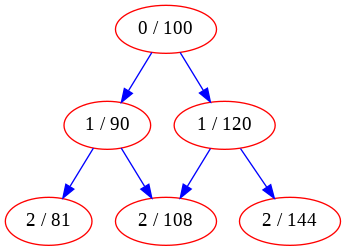

In [2]:
for time in range(0,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time)]/numeraire[(omega,time)]
        discountedprocess.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforwarddiscounted.add_edge('%d / %d'% (time-1,discountedprocess[(omega,time-1)]),'%d / %d'% (time,discountedprocess[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))


Image(binomialtreeforwarddiscounted.draw(format='png',prog='dot')) 

In [3]:
def condprob(omega,time): 
    omegahelperu = list(omega)
    omegahelperd = list(omega)
    omegahelperu[time]=1
    omegahelperd[time]=0
    omegahelperu = tuple(omegahelperu)
    omegahelperd = tuple(omegahelperd)
    return (discountedprocess[(omega,time)]-discountedprocess[(omegahelperd,time+1)])/(discountedprocess[(omegahelperu,time+1)]-discountedprocess[(omegahelperd,time+1)])

The previous function calculates the conditional probabilities which make the process at each node a martingale. Finally the price of a Eurpean Call payoff is calculated in a backwards manner. The tree is drawn in the format time / stock price / derivative price.

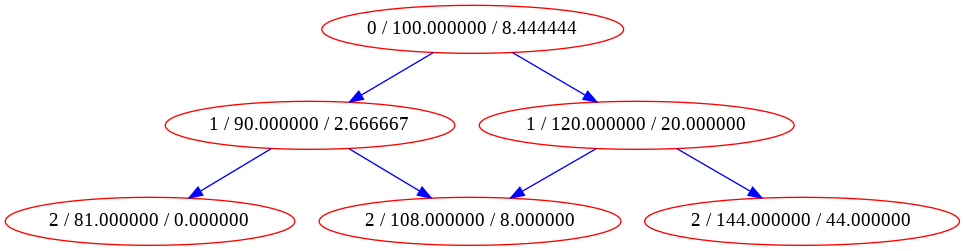

In [4]:
processbackward = {(omega,timesteps):(payoffE(process[(omega,timesteps)])/numeraire[(omega,timesteps)]) for omega in trajectories}
#backwardssteps: European
for time in reversed(range(0,timesteps)):
    for omega in trajectories:
        shelper=0                                   
        omegahelperu = list(omega)
        omegahelperd = list(omega)
        omegahelperu[time]=1
        omegahelperd[time]=0
        omegahelperu = tuple(omegahelperu)
        omegahelperd = tuple(omegahelperd)
        shelper = processbackward[(omegahelperu,time+1)]*condprob(omega,time)+processbackward[(omegahelperd,time+1)]*(1-condprob(omega,time))
        processbackward.update({(omega,time):shelper})

for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreebackward.add_edge('%d / %f / %f'% (time-1,discountedprocess[(omega,time-1)],processbackward[(omega,time-1)]),'%d / %f / %f'% (time,discountedprocess[(omega,time)],processbackward[(omega,time)]))

Image(binomialtreebackward.draw(format='png',prog='dot'))       

# No arbitrage, hedging and a bit of machine learning

In the sequel we look at the above ideas in a continuous time setting, which can be seen as a limit for many trading times and a particular scenario generation structure. Additionally we shall not 'calculate' the solution withing a given model, but learn it in a model-independent way. The method is called 'deep hedging' and applies machine learning technology.

Deep Hedging goes back to the following [paper](https://arxiv.org/abs/1802.03042)  by Hans Bühler, Lukas Gonon, Josef Teichmann and Ben Wood. 

The main idea is to parametrize the hedging strategies (at each time) via neural networks which can depend on input variables chosen by the user, for instance the current price, the past strategy, etc.
This then allows to solve a potentially high dimensional hedging problem for many assets whose dynamics are described by an arbitrary given arbitrage free model even in the presence of transaction costs.

Let us exemplify first the idea by the Black Scholes model in one dimension.

Let $T$ be a finite time horizon and consider on a filtered probability space $(\Omega, (\mathcal{F}_{0\leq t\leq T}), \mathcal{F}_T, P)$ a standard Black Scholes model with interest rate $r=0$ and the price of the risky asset $S$ being described by

$$
dS_t=S_t\mu dt + S_t\sigma dW^{\mathbb{P}}_t, \quad S_0=S_0
$$

under the physical measure $\mathbb{P}$. Here $\mu \geq 0$, $\sigma \neq 0$, $S_0 >0$ and $W^{\mathbb{P}}$ is a Brownian motion (under $\mathbb{P}$).

Under the unique risk neutral probability measure, denoted by $\mathbb{Q}$, the dynamics are then given by

$$
dS_t= S_t\sigma dW_t, \quad S_0=S_0
$$

where $W$ is a $\mathbb{Q}$ Brownian motion 

We consider here the problem of hedging a $\mathcal{F}_T$-measurable claim $f(S_T)$. In the case of the Black Scholes model the hedging strategy can be found by the Delta hedge, i.e. 

$$
\Delta(t,s)=\partial_s \mathbb{E}_{Q}[f(S_T)| S_t=s].
$$

In more involved models this is no longer possible. In particular in incomplete models not every claim can be hedged and we thus need to optimize a hedging criterion. We here consider a __quadratic hedging criterion__ but other risk measures are of course also possible.

Let $\pi$ denote the price of the option, i.e. $\mathbb{E}_Q[f(S_T)]$. Then the goal is solve the following optimization problem 

$$
\inf_{H \text{ predictable }}\mathbb{E}[( f(S_T)- \pi- (H\bullet S)_T)^2],
$$

where $(H_t)$ ranges over all predictable process and $(H \bullet S)_T= \int_0^T H_t dS_t$ denotes the stochastic Ito integral. Optimizing over all predictabel processes is infeasable. 

Therefore we choose to specify $H_t$ in a smaller set: for each $t$ as a neural network whose input can be specified.  In complete Markovian models, as it is the case of the Black Scholes model, we know from the delta hedging strategy that it makes sense to parameterize $H_t$ as a function of the current price $S_t$.  In the current setting we therefore choose that the input of each neural network in the implementation below depends only on the current price, i.e. 

$$
H_t=g_t(S_t)
$$

and $g_t$ denotes a neural network.

We can view the above as supervised learning problem: the input data $x_i$ correspond to trajectories of $(S_t(\omega_i))_{0 \leq T}$, the output $y_i$ should be $0$ and the
the loss function is given by 

$$
\mathcal{L}=  \left(f(S_T(\omega_i))- \pi- \int_0^T g_t(S_t (\omega_i)) dS_t(\omega_i)\right)^2.
$$

To implement this we need to generate input data which will be our training data set. Consider the log price of $S_t$ under $\mathbb{Q}$, i.e.

$$
d\log(S_t)= -\frac{\sigma^2}{2} dt + \sigma dW_t.
$$

The practical implementation requires a time discretization.
If we discretize our time interval $[0,T]$ in $N$ time steps of length $T/N$ we can write 

$$
\log(S_i)= \log(S_{i-1}) -\frac{\sigma^2}{2} \frac{T}{N} + \sigma \sqrt{\frac{T}{N}} Z_i, i=1, \ldots, N
$$

where $Z_i$ are independent $N(0,1)$ distributed random variables. The discretized price $(S_0, S_1, \ldots S_N)$ is obtained by exponentiation.

In this disretized form the whole trajetory of the price $(S_0, S_1, \ldots S_N)$ is therefore determined by $(S_0, Z_1, \ldots, Z_N)$ or in other words $(S_0, X_1, \ldots, X_N)$  where $X_i$ are independent  $N(-\frac{\sigma^2}{2} \frac{T}{N} ,\sigma^2 \frac{T}{N})$ distributed random variables. Considering $K$ many samples thereof constitutes the input training data set. The outputs are simply $K$ zeros.

In the above loss function we also need to disretize the 
stochastic integral

$$
\int_0^T g_t(S_t (\omega)) dS_t(\omega).
$$

We do this by choosing $N$ neural networks $g_0, \ldots, g_{N-1}$ and disretizing the integral as follows:

$$
\sum_{i=0}^{N-1} g_i(S_i(\omega)) (S_{i+1}(\omega)-S_i(\omega))
$$


In [5]:
%tensorflow_version 1.x
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, Subtract, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add, Dot
from keras.backend import constant
from keras import optimizers

from keras.engine.topology import Layer
from keras.models import Model
from keras.layers import Input
from keras import initializers
from keras.constraints import max_norm
import keras.backend as K

import matplotlib.pyplot as plt

TensorFlow 1.x selected.


Using TensorFlow backend.


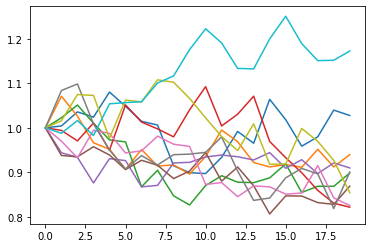

In [6]:
# Trajectories of the Black scholes model
# Let it run to initialize the following parameters, the trajectories 
# are not needed afterwards

N=20 # time disrectization
S0=1 # initial value of the asset
strike=1 # strike for the call option 
T=1.0 # maturity
sigma=0.2 # volatility in Black Scholes
R=10 # number of Trajectories

logS= np.zeros((N,R))
logS[0,]=np.log(S0)*np.ones((1,R))

for i in range(R):
    for j in range(N-1):
        increment = np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N))
        logS[j+1,i] =logS[j,i]+increment

S=np.exp(logS)

for i in range(R):
   plt.plot(S[:,i])
plt.show()


In [7]:
import scipy.stats as scipy
from scipy.stats import norm

#Blackscholes price

def BS(S0, strike, T, sigma):
    return S0*scipy.norm.cdf((np.log(S0/strike)+0.5*T*sigma**2)/(np.sqrt(T)*sigma))-strike*scipy.norm.cdf((np.log(S0/strike)-0.5*T*sigma**2)/(np.sqrt(T)*sigma))

priceBS=BS(S0,strike,T,sigma)
print('Price of a Call option in the Black scholes model with initial price', S0, 'strike', strike, 'maturity', T , 'and volatility' , sigma, 'is equal to', BS(S0,strike,T,sigma))

Price of a Call option in the Black scholes model with initial price 1 strike 1 maturity 1.0 and volatility 0.2 is equal to 0.07965567455405798


In [8]:
#Definition of neural networks for heding strategies

m = 1 # dimension of price
d = 2 # number of layers in strategy
n = 32  # nodes in the first but last layers

# architecture is the same for all networks
layers = []
for j in range(N):
    for i in range(d):
        if i < d-1:
            nodes = n
            layer = Dense(nodes, activation='relu',trainable=True,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str(i)+str(j))
        else:
            nodes = m
            layer = Dense(nodes, activation='linear', trainable=True,
                          kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                          bias_initializer='random_normal',
                          name=str(i)+str(j))
        layers = layers + [layer]


In [9]:
#Implementing the loss function
# Inputs is the training set below, containing the price S0, 
#the initial hedging being 0, and the increments of the log price process 
price = Input(shape=(m,))
hedge = Input(shape=(m,))

inputs = [price]+[hedge]
outputs = []

for j in range(N):
    outputs = outputs + [hedge]
    payoff= Lambda(lambda x : 0.5*(K.abs(x-strike)+x-strike) - priceBS )(price) 
    outputs = outputs + [payoff]
    strategy = price
    for k in range(d):
        strategy= layers[k+(j)*d](strategy) # strategy at j is the hedging strategy at j , i.e. the neural network g_j
    incr = Input(shape=(m,))
    logprice= Lambda(lambda x : K.log(x))(price)
    logprice = Add()([logprice, incr])
    pricenew=Lambda(lambda x : K.exp(x))(logprice)# creating the price at time j+1
    priceincr=Subtract()([pricenew, price])
    hedgenew = Multiply()([strategy, priceincr])
    #mult = Lambda(lambda x : K.sum(x,axis=1))(mult) # this is only used for m > 1
    hedge = Add()([hedge,hedgenew]) # building up the discretized stochastic integral
    inputs = inputs + [incr]
    price=pricenew
    
outputs = outputs + [hedge]
payoff= Lambda(lambda x : 0.5*(K.abs(x-strike)+x-strike) - priceBS )(price)
outputs = outputs + [payoff]
inputs = inputs
outputs= Concatenate()(outputs)

model_hedge = Model(inputs=inputs, outputs=outputs)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
Ktrain = 2*10**4
initialprice = S0

# xtrain consists of the price S0, 
#the initial hedging being 0, and the increments of the log price process 
xtrain = ([initialprice*np.ones((Ktrain,m))] +
          [np.zeros((Ktrain,m))]+
          [np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N),(Ktrain,m)) for i in range(N)])

ytrain=np.zeros((Ktrain,2*N+2))

Ktest = 1
initialprice = S0

# xtrain consists of the price S0, 
#the initial hedging being 0, and the increments of the log price process 
xtest = ([initialprice*np.ones((Ktest,m))] +
         [np.zeros((Ktest,m))]+
         [np.random.normal(-(sigma)**2*T/(2*N),sigma*np.sqrt(T)/np.sqrt(N),(Ktest,m)) for i in range(N)])

ytest=np.zeros((Ktest,2*N+2))

In [11]:
from keras import losses
def custom_loss(y_true,y_pred):
    z1 = y_pred[:,2*N+1]
    z2 = y_pred[:,2*N]
    z = z1-z2
    z=K.mean(K.square(z))
    return z

In [12]:
#sgd=optimizers.SGD(lr=0.0001)
#model_hedge.compile(optimizer=sgd,loss='mean_squared_error')
model_hedge.compile(optimizer='adam',loss=custom_loss)


Epoch 1/1
20000/20000 [==============================] - 4s 222us/step - loss: 0.0370


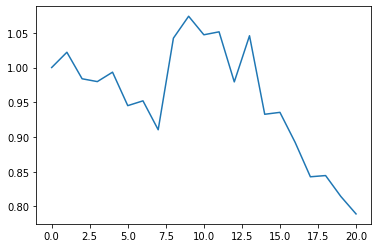

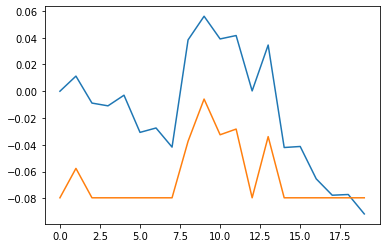

Epoch 1/1
20000/20000 [==============================] - 3s 136us/step - loss: 0.0018


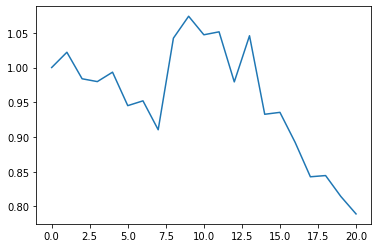

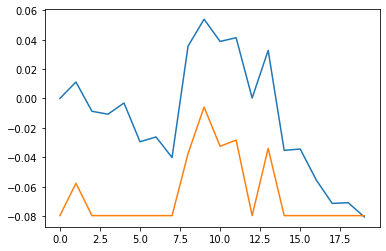

Epoch 1/1
20000/20000 [==============================] - 3s 139us/step - loss: 0.0015


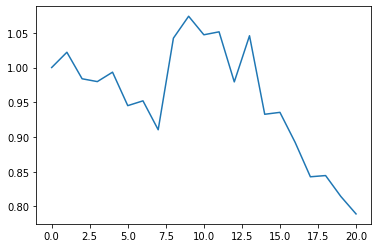

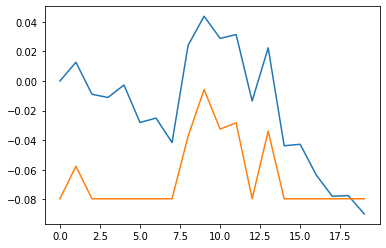

Epoch 1/1
20000/20000 [==============================] - 3s 155us/step - loss: 0.0012


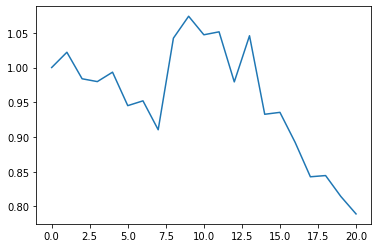

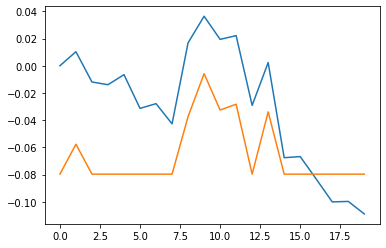

Epoch 1/1
20000/20000 [==============================] - 3s 139us/step - loss: 0.0011


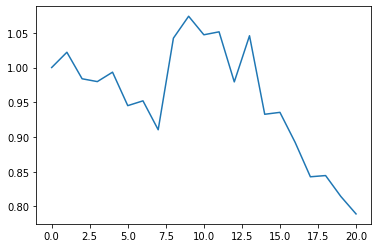

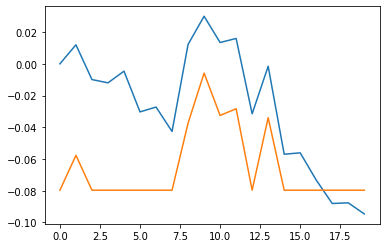

Epoch 1/1
20000/20000 [==============================] - 3s 147us/step - loss: 9.6629e-04


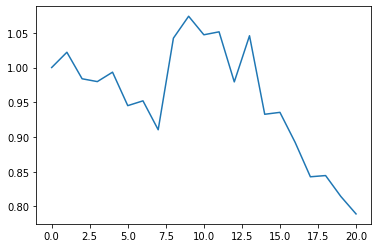

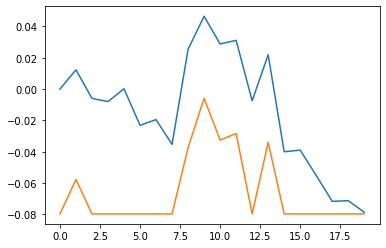

Epoch 1/1
20000/20000 [==============================] - 3s 146us/step - loss: 9.3481e-04


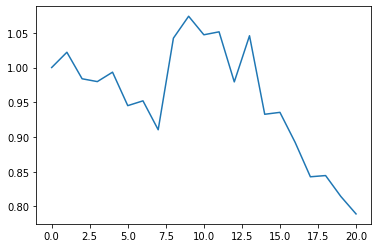

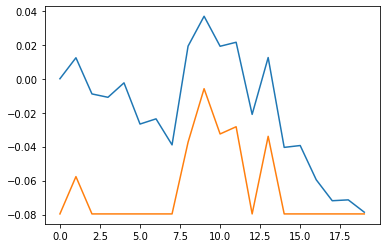

Epoch 1/1
20000/20000 [==============================] - 3s 152us/step - loss: 9.2772e-04


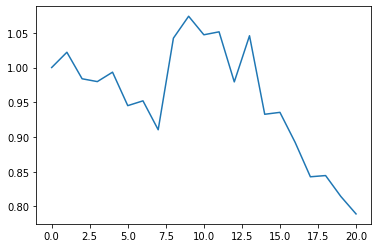

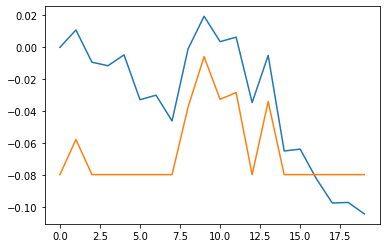

Epoch 1/1
20000/20000 [==============================] - 3s 162us/step - loss: 9.1540e-04


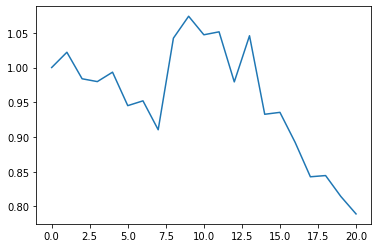

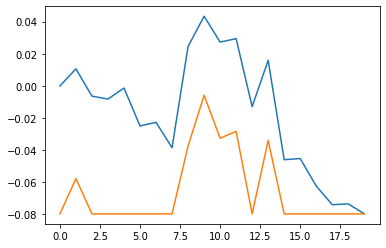

Epoch 1/1
20000/20000 [==============================] - 3s 167us/step - loss: 9.2402e-04


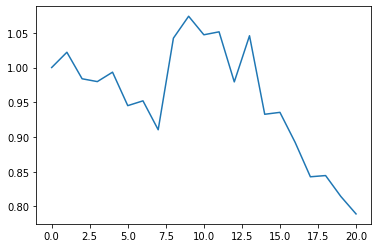

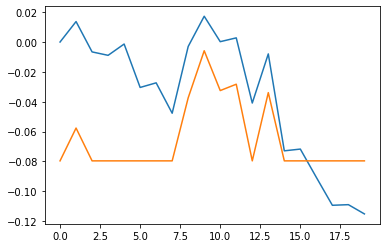

In [13]:
import matplotlib.pyplot as plt

for i in range(10):
    model_hedge.fit(x=xtrain,y=ytrain, epochs=1,verbose=True)
    helper = model_hedge.predict(xtest)
    for j in range(2*N):
        pricetrajectory = np.exp(np.cumsum(np.array([0]+[xtest[2+k][0][0] for k in range(N)])))
        hedgetrajectory = [helper[0,2*k] for k in range(N)]
        payofftrajectory = [helper[0,2*k+1] for k in range(N)]
    plt.plot(pricetrajectory)
    plt.show()
    plt.plot(hedgetrajectory)
    plt.plot(payofftrajectory)
    plt.show()

This provides us with a precise view on hedging and the machine learning way to construct hedging strategies.

# Fixed income markets -- basic notions

Prices of zero-coupon bonds (ZCB) with maturity $ T $ are denoted by $P(t,T)$. Interest rates are governed by a market of (default free) zero-coupon bonds modeled by stochastic processes 
$ {(P(t,T))}_{0 \leq t \leq T} $ for $ T \geq 0 $. We assume the normalization $ P(T,T)=1 $.

$T$ denotes the maturity of the bond, $P(t,T)$ its price at a time $t$ before maturity $T$.

The yield
$$
Y(t,T) = - \frac{1}{T-t} \log P(t,T)
$$
describes the compound interest rate p.a. for maturity $T$.

The curve $f$ is called the forward rate curve of the bond market
\begin{align*}
P(t,T)  &  =\exp(-\int_{t}^{T}f(t,s)ds)
\end{align*}
for $0\leq t\leq T$.

Let us understand a bit the dynamics of yield curves and forward rate curves at this point:

### We are now applying our principles from the first general part to this large market. We use extensively that we can choose the asset $S^0$ for our convenience. In different market situations we can have different ways of discounting. We shall see two: discounting by the bank account process and discounting by a (forward) bond $ P(t,T^*) $. 

The short rate process is given through $R_{t}=f(t,t)$ for $t\geq0$ defining the "bank account process"
$$
(B(t))_{t \geq 0}:=(\exp(\int_{0}^{t}R_{s}ds))_{t \geq 0}.
$$

Consider now $ P(t,T) $ as price of a contract which promises $ 1 $ at time $ T $ and do the discounting with $ S^0 $ equal the bank account process.

No arbitrage is then guaranteed if on the filtered probability space $ (\Omega,\mathcal{F},Q) $ with filtration
$ {(\mathcal{F}_t)}_{t \geq 0} $,
$$
E(\exp(-\int_t^T R_s ds)|\mathcal{F}_t) = P(t,T)
$$
holds true for $ 0 \leq t \leq T $ for some equivalent (martingale) measure $ Q $.

This is a useful and important approach but not feasible for many market situations. There it is better to take another discounting unit.

Consider a bond market $(P(t,T))_{t \leq T}$ with $P(T,T) = 1$ and $P(t,T) > 0$. Let $t \leq T \leq  T^{\ast}$. We define the simple forward rate through
\begin{align*}
F(t;T,T^{\ast}) := \frac{1}{T^{\ast} - T} \bigg( \frac{P(t,T)}{P(t,T^{\ast})} - 1 \bigg).
\end{align*}
and the simple spot rate through
\begin{align*}
F(t,T) := F(t;t,T).
\end{align*}

Apparently $P(t,T^{\ast}) F(t;T,T^{\ast})$ is first a traded portfolio (long in the $T$ bond and short in the $T^*$ bond) and the fair value at time $t$ of a contract paying $F(T,T^{\ast})$ at time $T^{\ast}$, since $ P(T^*,T^*) = 1 $.

Indeed, note that
\begin{align*}
P(t,T^{\ast}) F(t;T,T^{\ast}) &= \frac{P(t,T) - P(t,T^{\ast})}{T^{\ast} - T},
\\ F(T,T^{\ast}) &= \frac{1}{T^{\ast} - T} \bigg( \frac{1}{P(T,T^{\ast})} - 1 \bigg).
\end{align*}
Fair value means that we can build a portfolio at time $ t $ and at price $ \frac{P(t,T) - P(t,T^{\ast})}{T^{\ast} - T} $ yielding $ F(T,T^{\ast}) $ at time $ T^{\ast} $:

-> Holding a ZCB with maturity $ T $ at time $ t $ has value $ P(t,T) $, being additionally short in a ZCB with maturity $ T^{\ast} $ amounts all together to $P(t,T) - P(t,T^{\ast})$.

-> at time $T$ we have to rebalance the portfolio by buying with the maturing ZCB another bond with maturity $ T^{\ast} $, precisely an amount $ 1/P(T,T^{\ast}) $. 

-> at time $ T^{\ast} $ we receive $  1/P(T,T^{\ast}) - 1 $.

In this setup it is of course much better to take $ S^0 $ the $ T^*$ bond and to have $ X_t = F(t,T,T^*) $ as discounted price with respect to $ S^0 $. We can use all models for discounted prices like the binomial model or the Black-Scholes model for this situation.

In the sequel we apply the binomial tree model with one timestep with a simple forward rate process and the foward bond starting at $0.9$ and terminating at $1$. Here discounting matters what you can see in the difference between the first (format time / numeraire / foward rate time $T^*$ bond) and second tree (format time / simple forward rate).

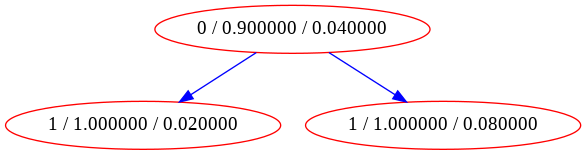

In [14]:
import numpy as np
from itertools import product


# EUROPEAN
F0 = 0.04
u  = 2
d  = 0.5
payoffE = lambda F: np.maximum(F-F0,0.)

timesteps = 1
bin = set((0,1))
trajectories = set(product(bin, repeat = timesteps))


import pygraphviz as PG
from IPython.display import Image
binomialtreeforward = PG.AGraph(directed=True, strict=True)
binomialtreeforward.edge_attr.update(len='2.0',color='blue')
binomialtreeforward.node_attr.update(color='red')
binomialtreeforwarddiscounted = PG.AGraph(directed=True, strict=True)
binomialtreeforwarddiscounted.edge_attr.update(len='2.0',color='blue')
binomialtreeforwarddiscounted.node_attr.update(color='red')
binomialtreebackward = PG.AGraph(directed=True, strict=True)
binomialtreebackward.edge_attr.update(len='2.0',color='blue')
binomialtreebackward.node_attr.update(color='red')
process = {(omega,0):F0 for omega in trajectories}
numeraire = {(omega,0):0.9 for omega in trajectories}
discountedprocess = {(omega,0):F0 for omega in trajectories}

#construct process by forward steps
for time in range(1,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        process.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        #shelper = process[(omega,time-1)]*u**(omega[time-1])*d**(1.-omega[time-1])
        numeraire.update({(omega,time):1.0})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforward.add_edge('%d / %f / %f'% (time-1,numeraire[(omega,time-1)],process[(omega,time-1)]),
                                     '%d / %f / %f'% (time,numeraire[(omega,time)],process[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))

Image(binomialtreeforward.draw(format='png',prog='dot')) 

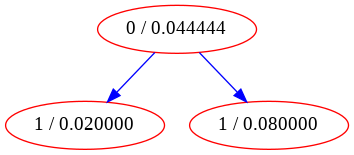

In [15]:
for time in range(0,timesteps+1):
    for omega in trajectories:
        shelper = process[(omega,time)]/numeraire[(omega,time)]
        discountedprocess.update({(omega,time):shelper})
        
for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreeforwarddiscounted.add_edge('%d / %f'% (time-1,discountedprocess[(omega,time-1)]),'%d / %f'% (time,discountedprocess[(omega,time)]))

#for time in range(1,timesteps+1):
#    for omega in trajectories:
#        binomialtreeforward.add_edge('%d, %d'% (time-1,numeraire[(omega,time-1)]),'%d, %d'% (time,numeraire[(omega,time)]))


Image(binomialtreeforwarddiscounted.draw(format='png',prog='dot')) 

In [16]:
def condprob(omega,time): 
    omegahelperu = list(omega)
    omegahelperd = list(omega)
    omegahelperu[time]=1
    omegahelperd[time]=0
    omegahelperu = tuple(omegahelperu)
    omegahelperd = tuple(omegahelperd)
    return (discountedprocess[(omega,time)]-discountedprocess[(omegahelperd,time+1)])/(discountedprocess[(omegahelperu,time+1)]-discountedprocess[(omegahelperd,time+1)])

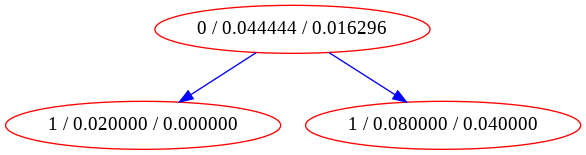

In [17]:
processbackward = {(omega,timesteps):(payoffE(process[(omega,timesteps)])/numeraire[(omega,timesteps)]) for omega in trajectories}
#backwardssteps: European
for time in reversed(range(0,timesteps)):
    for omega in trajectories:
        shelper=0                                   
        omegahelperu = list(omega)
        omegahelperd = list(omega)
        omegahelperu[time]=1
        omegahelperd[time]=0
        omegahelperu = tuple(omegahelperu)
        omegahelperd = tuple(omegahelperd)
        shelper = processbackward[(omegahelperu,time+1)]*condprob(omega,time)+processbackward[(omegahelperd,time+1)]*(1-condprob(omega,time))
        processbackward.update({(omega,time):shelper})

for time in range(1,timesteps+1):
    for omega in trajectories:
        binomialtreebackward.add_edge('%d / %f / %f'% (time-1,discountedprocess[(omega,time-1)],processbackward[(omega,time-1)]),'%d / %f / %f'% (time,discountedprocess[(omega,time)],processbackward[(omega,time)]))

Image(binomialtreebackward.draw(format='png',prog='dot'))       

In order to get prices back one has to multiply this tree with the corresponding numeraire prices, hence the actual caplet price will be $ 0.016296 * 0.9 $.

## Caps

In the sequel, we fix a number of future dates 
\begin{align*}
T_0 < T_1 < \ldots < T_n 
\end{align*}
with $T_i - T_{i-1} \equiv \delta$.

Fix a rate $\kappa > 0$. At time $T_i$ the holder of the cap receives
\begin{align*}
\delta (F(T_{i-1},T_i) - \kappa)^+.
\end{align*}
Let $t \leq T_0$. We write
\begin{align*}
{\rm Cpl}(t;T_{i-1},T_i), \quad i=1,\ldots,n
\end{align*}
for the time $t$ price of the $i$th caplet, and
\begin{align*}
{\rm Cp}(t) = \sum_{i=1}^n {\rm Cpl}(t;T_{i-1},T_i)
\end{align*}
for the time $t$ price of the cap.

## Floors 

At time $T_i$ the holder of the floor receives
\begin{align*}
\delta (\kappa - F(T_{i-1},T_i))^+.
\end{align*}
Let $t \leq T_0$. We write
\begin{align*}
{\rm Fll}(t;T_{i-1},T_i), \quad i=1,\ldots,n
\end{align*}
for the time $t$ price of the $i$th floorlet, and
\begin{align*}
{\rm Fl}(t) = \sum_{i=1}^n {\rm Fll}(t;T_{i-1},T_i)
\end{align*}
for the time $t$ price of the floor.

## Swaps

Fix a rate $K$ and a nominal $N$. The cash flow of a payer swap at $T_i$ is
\begin{align*}
(F(T_{i-1},T_i) - K) \delta N.
\end{align*}
The total value $\Pi_p(t)$ of the payer swap at time $t \leq T_0$ is
\begin{align*}
\Pi_p(t) = N \bigg( P(t,T_0) - P(t,T_n) - K \delta \sum_{i=1}^n P(t,T_i) \bigg).
\end{align*}
The value of a receiver swap at $t \leq T_0$ is
\begin{align*}
\Pi_r(t) = -\Pi_p(t).
\end{align*}
The swap rate $R_{\rm swap}(t)$ is the fixed rate $K$ which gives $\Pi_p(t) = \Pi_r(t) = 0$. Hence
\begin{align*}
R_{\rm swap}(t) = \frac{P(t,T_0) - P(t,T_n)}{\delta \sum_{i=1}^n P(t,T_i)}, \quad t \in [0,T_0].
\end{align*}

## Swaptions

A payer (receiver) swaption is an option to enter a payer (receiver) swap at $T_0$.
The payoff of a payer swaption at $T_0$ is
\begin{align*}
N \delta (R_{\rm swap}(T_0) - K)^+ \sum_{i=1}^n P(T_0,T_i),
\end{align*}
and of a receiver swaption
\begin{align*}
N \delta (K - R_{\rm swap}(T_0))^+ \sum_{i=1}^n P(T_0,T_i).
\end{align*}

## Spot measure

From now on, let $P$ be a martingale measure in the bond market $(P(t,T))_{t \leq T}$, i.e. for each $T > 0$ the discounted bond price process
\begin{align*}
\frac{P(t,T)}{B(t)}
\end{align*}
is a martingale. This leads to the following fundamental formula of interest rate theory
$$
P(t,T) = E(\exp(-\int_t^T R_s ds)) | \mathcal{F}_t )
$$
for $ 0 \leq t \leq T $.

## Forward measures

For $T^{\ast} > 0$ define the \emph{$T^{\ast}$-forward measure} ${P}^{T^{\ast}} $ such that for any $T > 0$ the discounted bond price process
\begin{align*}
\frac{P(t,T)}{P(t,T^{\ast})}, \quad t \in [0,T]
\end{align*}
is a ${P}^{T^{\ast}}$-martingale.


For any $T < T^{\ast}$ the simple forward rate
\begin{align*}
F(t;T,T^{\ast}) = \frac{1}{T^{\ast} - T} \bigg( \frac{P(t,T)}{P(t,T^{\ast})} - 1 \bigg)
\end{align*}
is a $\mathbb{P}^{T^{\ast}}$-martingale.

For any time derivative $X \in \mathcal{F}_{T^*}$ paid at $ T^* $ we have that the fair value via ``martingale pricing'' is given through
\begin{align*}
P(t,T^*) \mathbb{E}^{T^*}[X | \mathcal{F}_t].
\end{align*}
The fair price of the $i$th caplet is therefore given by
\begin{align*}
{\rm Cpl}(t;T_{i-1},T_i) = \delta P(t,T_i) \mathbb{E}^{T_i} [ (F(T_{i-1},T_i) - \kappa)^+ | \mathcal{F}_t].
\end{align*}
By the martingale property we obtain therefore
\begin{align*}
\mathbb{E}^{T_i}[F(T_{i-1},T_i)  | \mathcal{F}_t] = F(t;T_{i-1},T_i),
\end{align*}
what was proved by trading arguments before.

## Black's formula

Let $X \sim N(\mu,\sigma^2)$ and $K \in \mathbb{R}_{> 0}$. Then we have
\begin{align*}
\mathbb{E}[ (e^X - K)^+ ] &= e^{\mu + \frac{\sigma^2}{2}} \Phi \bigg( -\frac{\log K - (\mu + \sigma^2)}{\sigma} \bigg)
- K \Phi \bigg( -\frac{\log K - \mu}{\sigma} \bigg),
\\ \mathbb{E}[ (K - e^X)^+ ] &=  K \Phi \bigg( \frac{\log K - \mu}{\sigma} \bigg) - e^{\mu + \frac{\sigma^2}{2}} \Phi \bigg( \frac{\log K - (\mu + \sigma^2)}{\sigma} \bigg).
\end{align*}

## Black's formula for caps and floors


Let $t \leq T_0$. From our previous results we know that 
\begin{align*}
{\rm Cpl}(t;T_{i-1},T_i) &= \delta P(t,T_i) \mathbb{E}_t^{{T_i}} [ (F(T_{i-1},T_i) - \kappa)^+ ],
\\ {\rm Fll}(t;T_{i-1},T_i) &= \delta P(t,T_i) \mathbb{E}_t^{{T_i}} [ (\kappa - F(T_{i-1},T_i))^+ ],
\end{align*}
and that $F(t;T_{i-1},T_i)$ is an $P^{T_i}$-martingale.

We assume that under ${P}^{T_i}$ the forward rate  $F(t;T_{i-1},T_i)$ is an exponential Brownian motion
\begin{align*}
F(t;T_{i-1},T_i) & = F(s;T_{i-1},T_i) \\
&  \exp \bigg( -\frac{1}{2} \int_s^t \lambda(u,T_{i-1})^2 du + \int_s^t \lambda(u,T_{i-1}) dW_u^{T_i} \bigg)
\end{align*}
for $s \leq t \leq T_{i-1}$,
with a function $\lambda(u,T_{i-1})$. 

We define the variance $\sigma^2(t)$ as
\begin{align*}
\sigma^2(t) := \frac{1}{T_{i-1} - t} \int_t^{T_{i-1}} \lambda(s,T_{i-1})^2 ds.
\end{align*}
The $P^{T_i}$-distribution of $\log F(T_{i-1},T_i)$ conditional on $\mathcal{F}_t$ is
$N(\mu,\sigma^2)$ with
\begin{align*}
\mu &= \log F(t;T_{i-1},T_i) - \frac{\sigma^2(t)}{2} (T_{i-1} - t),
\\ \sigma^2 &= \sigma^2(t) (T_{i-1} - t).
\end{align*}
In particular
\begin{align*}
\mu + \frac{\sigma^2}{2} &= \log  F(t;T_{i-1},T_i),
\\ \mu + \sigma^2 &= \log  F(t;T_{i-1},T_i) + \frac{\sigma^2(t)}{2} (T_{i-1} - t).
\end{align*}

We have
\begin{align*}
{\rm Cpl}(t;T_{i-1},T_i) &= \delta P(t,T_i) (F(t;T_{i-1},T_i) \Phi(d_1(i;t)) - \kappa \Phi(d_2(i;t))),
\\ {\rm Fll}(t;T_{i-1},T_i) &= \delta P(t,T_i) ( \kappa \Phi(-d_2(i;t)) - F(t;T_{i-1},T_i) \Phi(-d_1(i;t)) ),
\end{align*}
where
\begin{align*}
d_{1,2}(i;t) = \frac{\log \big( \frac{F(t;T_{i-1},T_i)}{\kappa} \big) \pm \frac{1}{2} \sigma(t)^2 (T_{i-1} - t)}{\sigma(t) \sqrt{T_{i-1} - t}}.
\end{align*}